<a href="https://colab.research.google.com/github/Ozzyboy16900/handwritten-digit-recognition-cnn/blob/main/Handwritten_Digit_Recognition_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
8
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.8856 - loss: 0.3750
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 22ms/step - accuracy: 0.9728 - loss: 0.0917
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - accuracy: 0.9812 - loss: 0.0603
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9856 - loss: 0.0441
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - accuracy: 0.9895 - loss: 0.0344
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9907 - loss: 0.0294
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9912 - loss: 0.0249
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9929 - loss: 0.0207
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9926 - loss: 0.0224
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9937 - loss: 0.0175
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9809 - loss: 0.0730
Epoch 1/10
469/469 ━━━━━

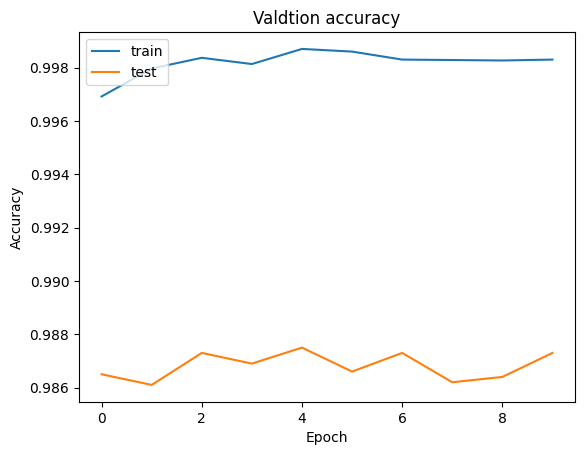

In [ ]:
#Othman Abunamous
#Handwritten Digit Recognition using Convolutional Neural Network
#5/25/2024

#We begin be importing the dataset from Tensorflow
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape
y_train.shape
type(x_train)
type(x_test)
type(y_test)
import matplotlib.pyplot as plt
image_index = 7777
print(y_train[image_index])

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)
model.evaluate(x_test, y_test)


history = model.fit(x_train , y_train , validation_data=(x_test , y_test) , epochs=10 , batch_size=128 , verbose=1) #list all data in history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Valdtion accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
